In [1]:
from utils.plot_utils import plot_returns
from scipy.interpolate import UnivariateSpline
import numpy as np

In [51]:
environment = "cartpole"
n_seeds = 30

# legends = ["Decision Tree, Depth=6","Decision Tree, Depth=8","Decision Tree, Depth=10", "Decision Tree, Depth=12", "Decision Tree, Depth=14"]
# legends = ["Neural Network", "Linear Model", "Decision Tree", "Random Forest", "Support Vectors", "K-Neighbours", "Gaussian Process"]
# legends = ["Neural Network", "Linear Model", "Decision Tree", "Random Forest"]
legends = ["Neural Network", "Linear Model", "Support Vectors", "K-Neighbours", "Gaussian Process"]
markers = ["x","^","+","v","o","*", "."]

In [37]:
## Evaluation Returns
# eval_means = []
# eval_lower = []
# eval_upper = []
# for i in range(len(legends)):
#     a = np.genfromtxt(f'{environment}/eval_returns/{environment}_eval_{legends[i]}.csv', delimiter=',')
#     eval_means.append(np.mean(a, axis=0))
#     eval_lower.append(np.mean(a, axis=0)-1.96*np.std(a, axis=0)/np.sqrt(n_seeds))
#     eval_upper.append(np.mean(a, axis=0)+1.96*np.std(a, axis=0)/np.sqrt(n_seeds))

# plot_returns(save_name="cartpole_eval_nn", values=eval_means, lower=eval_lower, upper=eval_upper, xlabel="Timesteps", ylabel="Average Returns", legend_names=legends, eval_freq=1000, markers=markers)

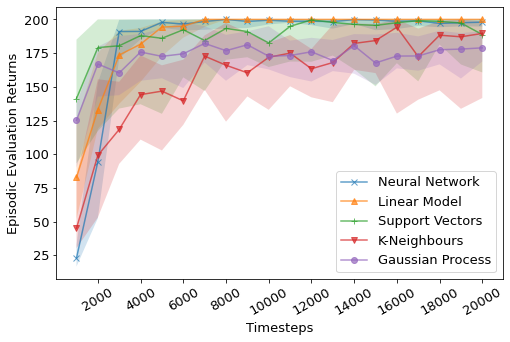

In [53]:
## Evaluation Returns Robust
eval_medians = []
eval_lower = []
eval_upper = []
eval_cvar = []
for i in range(len(legends)):
    a = np.genfromtxt(f'{environment}/eval_returns/{environment}_eval_{legends[i]}.csv', delimiter=',')
    cvar, q1, median, q3 = np.percentile(a, [5, 25, 50, 75], axis=0)
    eval_medians.append(median)
    eval_lower.append(q1)
    eval_upper.append(q3)
    eval_cvar.append(cvar)

plot_returns(save_name="cartpole_eval_other", values=eval_medians, lower=eval_lower, upper=eval_upper, xlabel="Timesteps", ylabel="Episodic Evaluation Returns", legend_names=legends, eval_freq=1000, markers=markers)
# plot_returns(save_name="cartpole_eval_other_risk", values=eval_cvar, lower=cvar, upper=cvar, xlabel="Timesteps", ylabel="Episodic Evaluation Returns", legend_names=legends, eval_freq=1000, markers=markers)

In [41]:
# ## Train Returns
# train_means = []
# train_lower = []
# train_upper = []
# # points = []
# xs = np.linspace(100, 20000, 200)

# for i in range(len(legends)):
#     points = []
#     a = np.genfromtxt(f'{environment}/train_returns/{environment}_train_{legends[i]}.csv', delimiter=',')
    
#     for j in range(0, n_seeds*2, 2):
#         x = [t for t in a[j+1] if np.isnan(t) == False]
#         y = [r for r in a[j] if np.isnan(r) == False]
#         spline = UnivariateSpline(x, y)
#         # points.append(spline(xs))
#         points.append(np.cumsum(spline(xs)))

#     train_means.append(np.mean(points,axis=0))
#     train_lower.append(np.mean(points, axis=0)-np.std(points, axis=0))
#     train_upper.append(np.mean(points, axis=0)+np.std(points, axis=0))

# plot_returns(save_name="cartpole_train_nn", values=train_means, lower=train_lower, upper=train_upper, xlabel="Timesteps", ylabel="Cumulative Reward", legend_names=legends, eval_freq=100, markers=None)

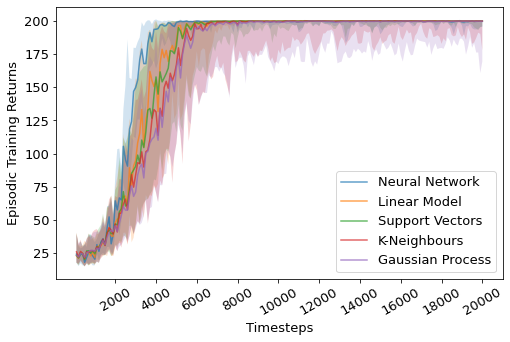

In [55]:
## Train Returns Robust
train_medians = []
train_lower = []
train_upper = []
train_cvar = []
points = []
xs = np.linspace(100, 20000, 200)

for i in range(len(legends)):
    a = np.genfromtxt(f'{environment}/train_returns/{environment}_train_{legends[i]}.csv', delimiter=',')
    
    for j in range(0, n_seeds*2, 2):
        x = [t for t in a[j+1] if np.isnan(t) == False]
        y = [r for r in a[j] if np.isnan(r) == False]
        spline = UnivariateSpline(x, y)
        points.append(spline(xs))
        # points.append(np.cumsum(spline(xs)))

    cvar, q1, median, q3 = np.percentile(points, [5, 25, 50, 75], axis=0)
    train_medians.append(median)
    train_lower.append(q1)
    train_upper.append(q3)
    train_cvar.append(cvar)

plot_returns(save_name="cartpole_train_other_nonc", values=train_medians, lower=train_lower, upper=train_upper, xlabel="Timesteps", ylabel="Episodic Training Returns", legend_names=legends, eval_freq=100, markers=None)